# Calculating AUROC

The average auc is 0.8703579521583866


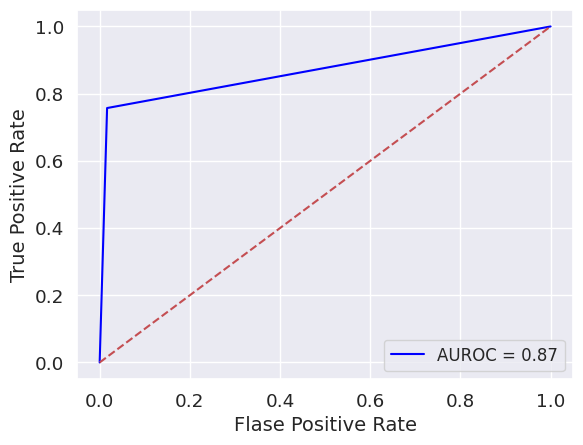

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def Draw_ROC():
    
    Labels = ["RB","OB","PF","DE","FS","IS","RO","IN","AF","BE","FO","GR","PH","PB","OS","OP","OK"]
    prediction_file = './sigmoid_results/C-Tran_val_sigmoid.csv'
    label_file = './sigmoid_results/SewerML_Val_only_defects.csv'
    
    outputDF = pd.read_csv(prediction_file)
    # outputDF = outputDF.sort_values(by=['Filename']).reset_index(drop=True)
    output = outputDF[Labels].values

    labelDF = pd.read_csv(label_file)
    # labelDF = labelDF.sort_values(by=['Filename']).reset_index(drop=True)
    label = labelDF[Labels].values

    avg_fpr = 0
    avg_tpr = 0
    avg_auc = 0
    for i in range(17):
        fpr_CSNN,tpr_CSNN,thresholds=roc_curve(list(output[:, i]),
                                            list(label[:, i]))
        avg_fpr += fpr_CSNN
        avg_tpr += tpr_CSNN
        roc_auc_CSSSNN=auc(fpr_CSNN,tpr_CSNN)
        avg_auc += roc_auc_CSSSNN

    fpr_CSNN = avg_fpr/17
    tpr_CSNN = avg_tpr/17
    roc_auc_CSSSNN = avg_auc / 17
    print(f'The average auc is {roc_auc_CSSSNN}')
    sns.set(font_scale=1.2)

    plt.plot(fpr_CSNN,tpr_CSNN,'blue',label='AUROC = %0.2f'% roc_auc_CSSSNN)
    plt.legend(loc='lower right',fontsize = 12)
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('True Positive Rate',fontsize = 14)
    plt.xlabel('Flase Positive Rate',fontsize = 14)
    plt.show()

if __name__=="__main__":
    Draw_ROC()

